<a href="https://colab.research.google.com/github/dhivya4/Inceptz/blob/main/Mini_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns               
import matplotlib.pyplot as plt    
%matplotlib inline

In [2]:
train = pd.read_csv("https://raw.githubusercontent.com/dhivya4/Inceptz/main/train_ctrUa4K.csv")

In [3]:
test = pd.read_csv("https://raw.githubusercontent.com/dhivya4/Inceptz/main/test_lAUu6dG.csv")

In [4]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [6]:
train.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,614,614,LP001002,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,601,2,Male,489,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,611,2,Yes,398,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,599,4,0,345,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,614,2,Graduate,480,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,582,2,No,500,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,614.0,NaN,NaN,NaN,5403.459283,6109.041673,150.0,2877.5,3812.5,5795.0,81000.0
CoapplicantIncome,614.0,NaN,NaN,NaN,1621.245798,2926.248369,0.0,0.0,1188.5,2297.25,41667.0
LoanAmount,592.0,NaN,NaN,NaN,146.412162,85.587325,9.0,100.0,128.0,168.0,700.0
Loan_Amount_Term,600.0,NaN,NaN,NaN,342.0,65.12041,12.0,360.0,360.0,360.0,480.0


In [7]:
test.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Loan_ID,367,367,LP001015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,356,2,Male,286,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Married,367,2,Yes,233,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,357,4,0,200,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Education,367,2,Graduate,283,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Self_Employed,344,2,No,307,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ApplicantIncome,367.0,NaN,NaN,NaN,4805.599455,4910.685399,0.0,2864.0,3786.0,5060.0,72529.0
CoapplicantIncome,367.0,NaN,NaN,NaN,1569.577657,2334.232099,0.0,0.0,1025.0,2430.5,24000.0
LoanAmount,362.0,NaN,NaN,NaN,136.132597,61.366652,28.0,100.25,125.0,158.0,550.0
Loan_Amount_Term,361.0,NaN,NaN,NaN,342.537396,65.156643,6.0,360.0,360.0,360.0,480.0


In [9]:
train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [10]:
test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

In [13]:
train.shape , test.shape


((614, 13), (367, 12))

In [14]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

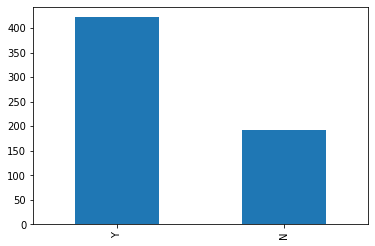

In [16]:
train['Loan_Status'].value_counts().plot.bar()

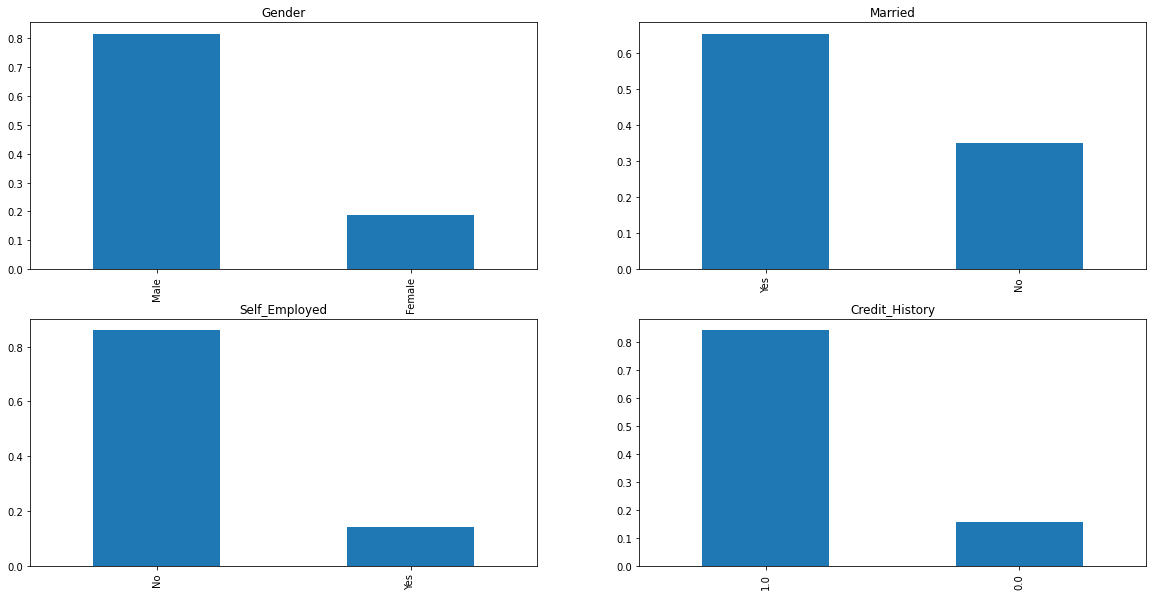

In [17]:
plt.figure(1) 
plt.subplot(221)
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title = 'Gender') 
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title = 'Married') 
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title = 'Self_Employed') 
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title = 'Credit_History') 
plt.show()

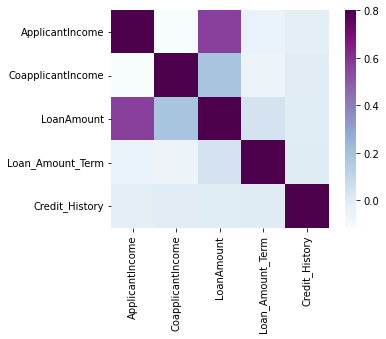

In [19]:
matrix = train.corr()
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")